## Objectif:
   Developpement d'un scripte Python pour la reconnaisance des chiffres manuscrits en utilisant le Deep learning
   
   
## Source:
   Utilisation de la base de donnée Mnist disponible sur la bibliotheque de keras 
   
## Resultats:
   Developement d'un model de Deep learning capable de lire un chiffre manuscrit 
   
## References 
   https://lesdieuxducode.com/blog/2019/1/prototyper-un-reseau-de-neurones-avec-keras

In [1]:
# librairies nécessaires 
from keras.optimizers import RMSprop, Adadelta, Adam
from keras import utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import numpy as np
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import preprocessing

Using TensorFlow backend.


In [2]:
# Mettre le seaborn contexte pour touts les graphes de plt
sns.set()

# 1. Base de données

## 1. 1. Chragement de la base de données Mnist

In [3]:
## Chargement de la base de données mnist
(Xtrain, Ytrain), (Xtest, Ytest) = mnist.load_data()
#chargement des données d'apprentissage, et de test avec la fonction load_data()

In [4]:
#Information sur les données 
print(Xtrain.shape)  # 60000 echantillons pour training, 28*28 c'est la dimension d'un image c'est a dire une dimension de 28 px * 28 px 
print(Xtest.shape)  # 10000 echantillons pour test
print(Ytrain.shape) # La variable de sortie training
print(Ytest.shape) # la varibale de sortie test
print(np.unique(Ytrain)) 
print(np.unique(Ytest))

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)
[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


## 1.2. Analyse des données

(array([5923., 6742., 5958., 6131., 5842., 5421., 5918., 6265., 5851.,
        5949.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

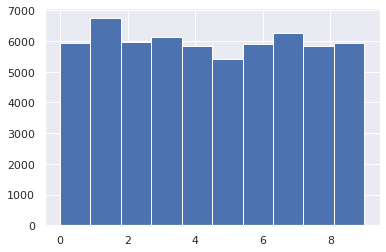

In [5]:
# Visualisation des classes 
plt.hist(Ytrain) 


On remarque que on a des classes équilibrés 

In [6]:
image_index= 60
print(Ytrain[image_index])

4


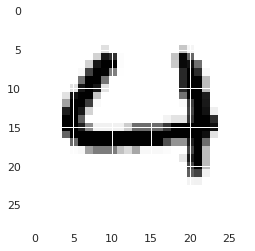

In [7]:
# Tracer l'image 60
plt.imshow(Xtrain[image_index], cmap='Greys')

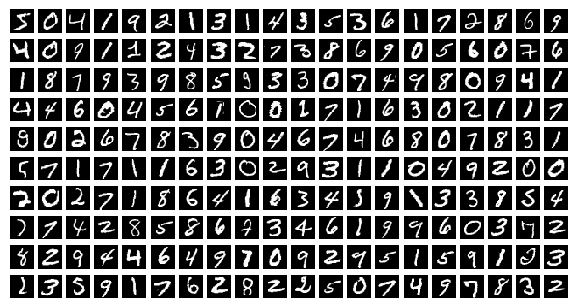

In [8]:
mpl.use('TKAgg')
plt.figure(figsize=(7.195, 3.841), dpi=100)
for i in range(200):
  plt.subplot(10,20,i+1)
  plt.imshow(Xtrain[i], cmap='gray')
  plt.axis('off')
plt.show()

## 1.3. Data preprocessing
    

In [9]:
# Redimension et la normalisation des données 
Xtrain = Xtrain.reshape(Xtrain.shape[0], 28, 28, 1)
## Standardisation des données des données training
Xtrain = Xtrain.astype('float32')
Xtrain /= 255
shape_input = (Xtrain.shape[1], Xtrain.shape[2], Xtrain.shape[3])

In [10]:
# Encodage de la variable de sortie 
lb = preprocessing.LabelBinarizer()
Ytrain = lb.fit_transform(Ytrain)

# 2.Training Data 
  
## 2.1 Construction du Model

In [11]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(4, 4), input_shape=shape_input))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer=RMSprop(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## 2.1 Entrainement du Model

In [12]:
model.fit(x=Xtrain, y=Ytrain, epochs=3, batch_size=100)

Epoch 1/3
60000/60000 [==============================] - 52s 869us/step - loss: 0.2286 - accuracy: 0.9319
Epoch 2/3
60000/60000 [==============================] - 64s 1ms/step - loss: 0.0910 - accuracy: 0.9728
Epoch 3/3
60000/60000 [==============================] - 68s 1ms/step - loss: 0.0656 - accuracy: 0.9804


## 2.1 Prediction

7


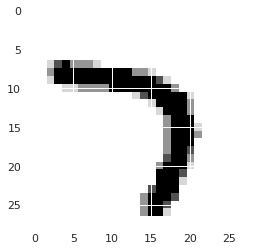

In [13]:
## choisir une image des données test
image_index = 60
print(Ytest[60])  ## 7
plt.imshow(Xtest[image_index], cmap='Greys')

In [14]:
# Redimension et la normalisation des données test
Xtest = Xtest.reshape(Xtest.shape[0], 28, 28, 1)
## Standardisation des données des données test
Xtest = Xtest.astype('float32')
Xtest /= 255

In [15]:
## Prediction
pred = model.predict(Xtest)

In [16]:
##transformation des resultats de la prediction
pred[pred < 0.6] = 0  # le choix du 0.6 est arbitraire
pred[pred > 0.6] = 1
pred = lb.inverse_transform(pred)
print(pred[image_index] == Ytest[image_index])

True


In [17]:
print(confusion_matrix(Ytest, pred))
print(classification_report(Ytest, pred, digits=10))

[[ 976    0    0    1    0    0    0    1    1    1]
 [   5 1126    1    0    0    0    2    1    0    0]
 [  19    2 1003    1    2    0    1    3    1    0]
 [   9    0    1  995    0    0    0    4    1    0]
 [  12    0    1    0  957    0    4    1    0    7]
 [  19    0    0    3    0  864    2    1    3    0]
 [  20    2    0    1    1    2  932    0    0    0]
 [  21    1    6    0    0    0    0  999    0    1]
 [  19    0    1    1    3    0    0    2  945    3]
 [  26    2    0    3    7    1    0    3    1  966]]
              precision    recall  f1-score   support

           0  0.8667850799 0.9959183673 0.9268755935       980
           1  0.9938217123 0.9920704846 0.9929453263      1135
           2  0.9901283317 0.9718992248 0.9809290954      1032
           3  0.9900497512 0.9851485149 0.9875930521      1010
           4  0.9865979381 0.9745417515 0.9805327869       982
           5  0.9965397924 0.9686098655 0.9823763502       892
           6  0.9904357067 0.9728601